# Used car analysis 
##### _Mario Krivosic_


In [1]:
#import neccesary packages for extraction and graphing
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sbn
import scipy as sp
import requests
%matplotlib inline

In [2]:
#Get data
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
data = requests.get(file_path)



In [3]:
#convert it to a file
with open ('download', 'wb') as file:
    file.write(data.content)

In [4]:
#read and trasnform data to pandas 
df = pd.read_csv('download', header = 0)

In [5]:
#check the first rows of data to ensure they are fine
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
#ensure all data types are corrext 
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


In [7]:
#check correleation between variables and their types
df[['bore', 'stroke', 'compression-ratio', 'horsepower', 'engine-size', 'price']].corr()

,bore,stroke,compression-ratio,horsepower,engine-size,price
bore,1.000000,-0.055390,0.001263,0.566936,0.572609,0.543155
stroke,-0.055390,1.000000,0.187923,0.098462,0.209523,0.082310
compression-ratio,0.001263,0.187923,1.000000,-0.214514,0.028889,0.071107
horsepower,0.566936,0.098462,-0.214514,1.000000,0.822676,0.809575
engine-size,0.572609,0.209523,0.028889,0.822676,1.000000,0.872335
price,0.543155,0.082310,0.071107,0.809575,0.872335,1.000000


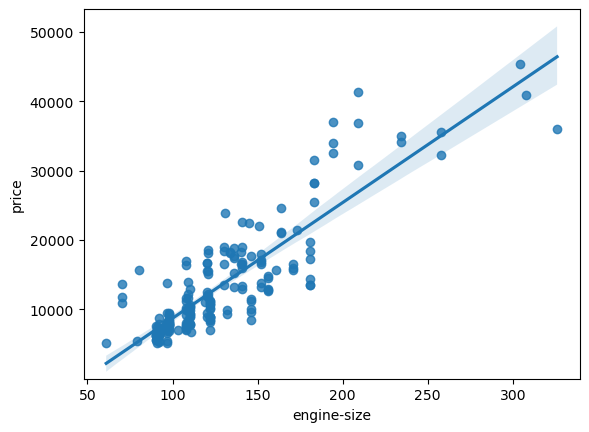

In [8]:
#plot the idnetified high correlation between price and engine-size
sbn.regplot(x="engine-size", y = "price", data=df)
plt.ylim(1,)  #plot line which showcases trend
plt.show()

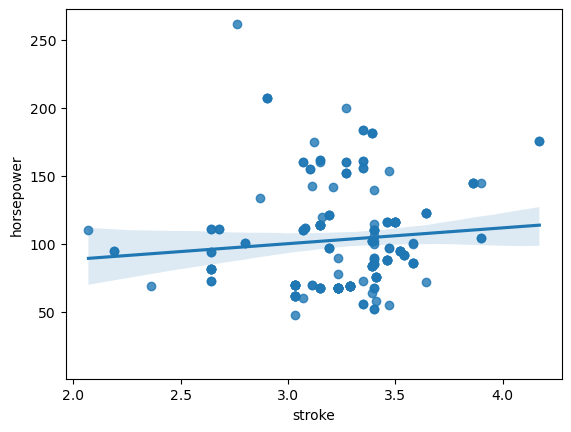

In [9]:
#plot another statistical relationship which was shown to have some correlation
sbn.regplot(x='stroke', y = 'horsepower', data = df)
plt.ylim(1,)
plt.show()
# data  shows a weak correleation 

# Categorical Value analysis


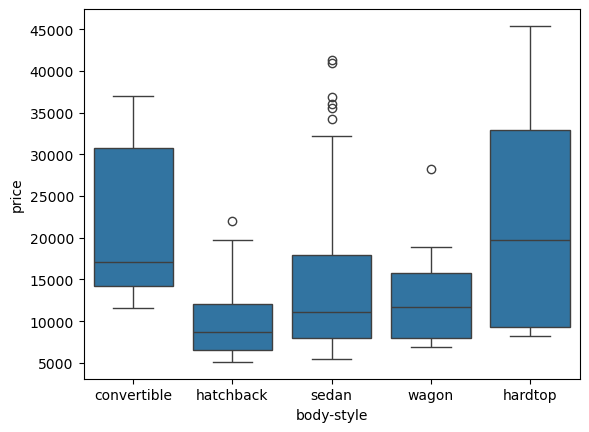

In [10]:
# relationship between categorical value and price
sbn.boxplot(x='body-style', y = 'price', data = df)
plt.show()

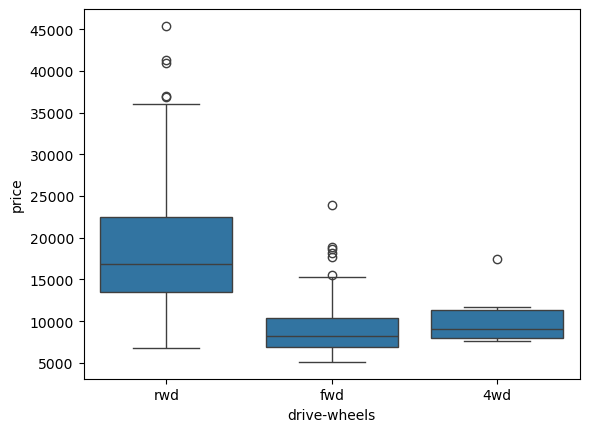

In [11]:
#asses similiar relationship with wheels
sbn.boxplot(x = 'drive-wheels', y = 'price', data = df)
plt.show()

# Descriptive tests

Look into the data more thoroughly to understand it better

In [12]:
#get overview of data just integers
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [13]:
#overview of dara with objects 
df.describe(include = ['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [14]:
#check and convert drive wheeks
df['drive-wheels'].value_counts()
drive_wheels_count = df['drive-wheels'].value_counts().to_frame()

In [15]:
#add this to column and rename 
drive_wheels_count.reset_index(inplace = True)
drive_wheels_count = drive_wheels_count.rename(columns={'drive-wheels':'Value_counts'})
drive_wheels_count

,Value_counts,count
0,fwd,118
1,rwd,75
2,4wd,8


In [17]:
#rename the index column
drive_wheels_count.index.name = 'drive-wheels'
drive_wheels_count

,Value_counts,count
drive-wheels,,
0,fwd,118
1,rwd,75
2,4wd,8


In [74]:
#create seperate database for engine 
engine_loc = df['engine-location'].value_counts().to_frame()
engine_loc.rename(columns={'engine-location':'value_count'})
engine_loc.index.name = 'engine-location'
engine_loc.head()

,count
engine-location,
front,198
rear,3


## initial findings  
This sugest engine_location is a bad predictor of price due to possible skewness caused by low number of rear cars and drive wheels while hvent adequete splits between fwd, rwd however 4wd is under represented

In [19]:
 #group wheels to find relationship with price 
df_wheel_group = df[['drive-wheels', 'body-style', 'price']]

In [22]:
#add it to a group by and look at mean exchanging price as the name 
df_grouped = df_wheel_group.groupby(['drive-wheels'], as_index= False).agg({'price':'mean'})
df_grouped

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [23]:
# lets expand the analysis by adding body-style 
df_grouped = df_wheel_group.groupby(['drive-wheels', 'body-style'], as_index= False).agg({'price':'mean'})
df_grouped

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [25]:
#convert this to a pivot table 
group_pivot = df_grouped.pivot(index = 'drive-wheels', columns = 'body-style')
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [26]:
# fill the null values with 0 to allow analysis
group_pivot = group_pivot.fillna(0)
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

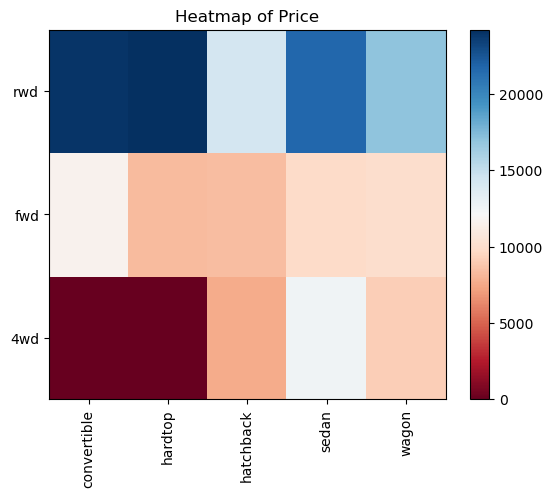

In [51]:
#visualise with a heat map
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap = 'RdBu')

#Labeling heatmap
row_labels = group_pivot.columns.levels[1]
col_labels = group_pivot.index
#move labels to the middle 
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor = False)

#insert labels
ax.set_xticklabels(row_labels)
ax.set_yticklabels(col_labels)
ax.set_title('Heatmap of Price')
plt.xticks(rotation = 90)

fig.colorbar(im)
plt.show()





# Utilising p-value

In [52]:
#import package for scientific 
from scipy import stats 

In [56]:
# getting pearson coeffecient 
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(f"The pearson coeffecint: {pearson_coef}", f"the p-value: {p_value}")

The pearson coeffecint: 0.5846418222655081 the p-value: 8.076488270732885e-20


THe p-value is less then 1e-4 the correleation is significant 
The pearson coeffecient suggest a modertly strong _positive_ linear relationship

In [58]:
#getting some more pearsons and p-value for other variable
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print(f"The pearson coeffecint: {pearson_coef}", f"the p-value: {p_value}")

The pearson coeffecint: -0.7046922650589529 the p-value: 1.7495471144476463e-31


p-Value suggest strong coeraltion 
Pearson shows stronger negative linear relationship